In [6]:
import random
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Logistic Regression From Scratch</h1>
<h3>Start with Loading in Data</h3>

In [7]:
def load_data(file_path):
    data = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into tokens based on whitespace separation
            tokens = line.strip().split()

            # Convert "Present" or "Absent" to binary. Assuming this is always the 5th column in the data.
            binary_feature = 1 if tokens[4] == "Present" else 0
            
            # Replace the "Present"/"Absent" with its binary representation
            tokens[4] = binary_feature

            # All tokens except the last are features (convert all to floats)
            features = [float(token) for token in tokens[:-1]]

            # The last token is the label (convert to int)
            label = int(tokens[-1])

            # Add the feature vector and label to the data lists
            data.append(features)
            labels.append(label)

    return data, labels

dataset1 = '../../dataset/project3_dataset1.txt'
dataset2 = '../../dataset/project3_dataset2.txt'

data1, labels1 = load_data(dataset1)
data2, labels2 = load_data(dataset2)

<h3>Add Intercept Term and Initialize Weights</h3>

In [8]:
# Create Intercepts
data1_with_intercept = [[1] + row for row in data1]
data2_with_intercept = [[1] + row for row in data2]

# Initialize Weights
weights1 = [random.uniform(-0.01, 0.01) for _ in range(len(data1_with_intercept[0]))]
weights2 = [random.uniform(-0.01, 0.01) for _ in range(len(data2_with_intercept[0]))]

<h3>Model Training</h3>

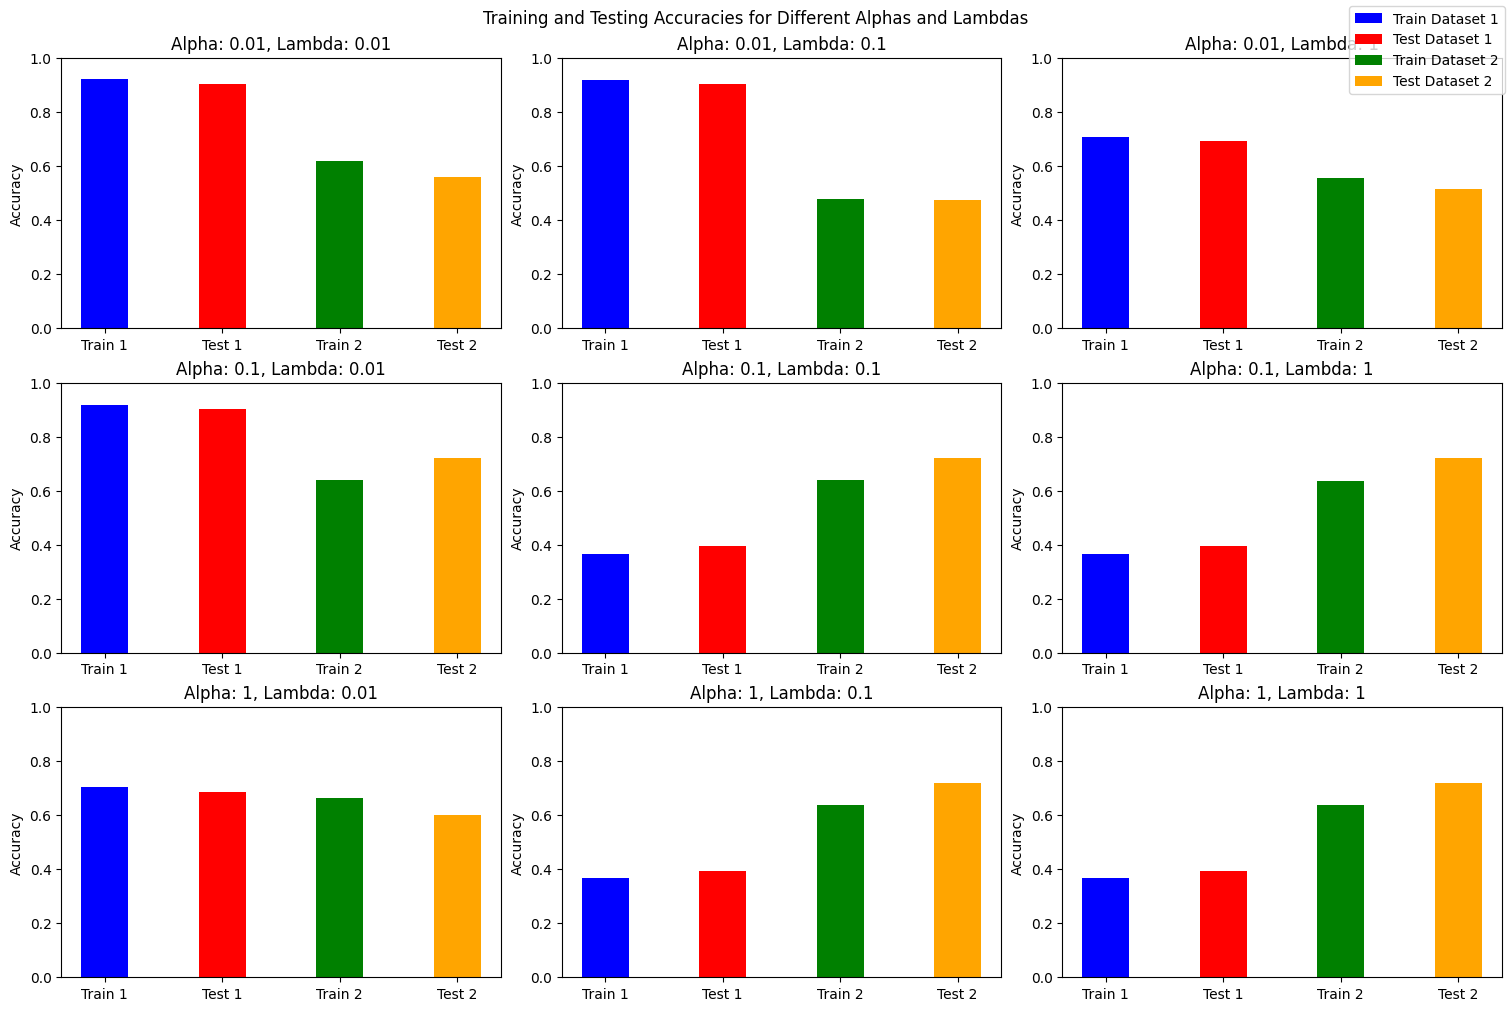

Best Training Accuracy for Dataset 1: 92.09% (Alpha: 0.01, Lambda: 0.01)
Test Accuracy for the Best Model on Dataset 1: 90.35%
Best Training Accuracy for Dataset 2: 63.96% (Alpha: 0.1, Lambda: 0.01)
Test Accuracy for the Best Model on Dataset 2: 72.04%


In [9]:
def sigmoid(z):
    if z < 0:
        return math.exp(z) / (1 + math.exp(z))
    else:
        return 1 / (1 + math.exp(-z))



# Predict Function
def predict(X, theta):
    return [1 if sigmoid(sum(w * x for w, x in zip(theta, xi))) >= 0.5 else 0 for xi in X]

# Calculate Accuracy
def calculate_accuracy(predictions, labels):
    correct = sum(p == l for p, l in zip(predictions, labels))
    accuracy = correct / len(labels)
    return accuracy

def compute_gradient_with_regularization(X, y, theta, lambda_reg):
    m = len(y)
    gradient = [0 for _ in range(len(theta))]
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        prediction = sigmoid(sum(w * x for w, x in zip(theta, xi)))
        for j in range(len(theta)):
            reg_term = lambda_reg * theta[j] if j != 0 else 0
            gradient[j] += (prediction - yi) * xi[j] + reg_term
    
    gradient = [g / m for g in gradient]
    return gradient

def gradient_descent_with_regularization(X, y, theta, alpha, iterations, lambda_reg):
    for _ in range(iterations):
        gradient = compute_gradient_with_regularization(X, y, theta, lambda_reg)
        theta = [t - alpha * g for t, g in zip(theta, gradient)]
    return theta

# Split data into training and testing sets
train_data1, test_data1, train_labels1, test_labels1 = train_test_split(data1_with_intercept, labels1, test_size=0.2)
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data2_with_intercept, labels2, test_size=0.2)

# Hyperparameters to vary
alphas = [0.01, 0.1, 1]
lambdas = [0.01, 0.1, 1] 
iterations = 1000

# Variables to Keep Track of Best Results
best_testing_accuracy_1 = 0
corresponding_training_accuracy_1 = 0
best_params_1 = {'alpha': None, 'lambda': None}
best_weights_1 = None

best_testing_accuracy_2 = 0
corresponding_training_accuracy_2 = 0
best_params_2 = {'alpha': None, 'lambda': None}
best_weights_2 = None




results = []

# Results loop
for alpha in alphas:
    for lambda_reg in lambdas:
        weights1 = [random.uniform(-0.01, 0.01) for _ in range(len(train_data1[0]))]
        weights2 = [random.uniform(-0.01, 0.01) for _ in range(len(train_data2[0]))]

        # Gradient descent
        weights1 = gradient_descent_with_regularization(train_data1, train_labels1, weights1, alpha, iterations, lambda_reg)
        weights2 = gradient_descent_with_regularization(train_data2, train_labels2, weights2, alpha, iterations, lambda_reg)

        # Calculate accuracies
        train_predictions1 = predict(train_data1, weights1)
        test_predictions1 = predict(test_data1, weights1)
        train_accuracy1 = calculate_accuracy(train_predictions1, train_labels1)
        test_accuracy1 = calculate_accuracy(test_predictions1, test_labels1)

        train_predictions2 = predict(train_data2, weights2)
        test_predictions2 = predict(test_data2, weights2)
        train_accuracy2 = calculate_accuracy(train_predictions2, train_labels2)
        test_accuracy2 = calculate_accuracy(test_predictions2, test_labels2)

        # Updating Best Accuracies
        if test_accuracy1 > best_testing_accuracy_1:
            best_testing_accuracy_1 = test_accuracy1
            corresponding_training_accuracy_1 = train_accuracy1
            best_weights_1 = weights1
            best_params_1 = {'alpha': alpha, 'lambda': lambda_reg}

        if test_accuracy2 > best_testing_accuracy_2:
            best_testing_accuracy_2 = test_accuracy2
            corresponding_training_accuracy_2 = train_accuracy2
            best_weights_2 = weights2
            best_params_2 = {'alpha': alpha, 'lambda': lambda_reg}


        # Store results in the results list
        results.append({
            'alpha': alpha,
            'lambda': lambda_reg,
            'train_acc_1': train_accuracy1,
            'test_acc_1': test_accuracy1,
            'train_acc_2': train_accuracy2,
            'test_acc_2': test_accuracy2
        })



# Create Plots
n_rows = len(alphas)
n_cols = len(lambdas)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Title
fig.suptitle('Training and Testing Accuracies for Different Alphas and Lambdas')

for i, alpha in enumerate(alphas):
    for j, lambda_reg in enumerate(lambdas):
        ax = axes[i, j] if n_rows > 1 else axes[j]
        # Filter results
        filtered_results = [r for r in results if r['alpha'] == alpha and r['lambda'] == lambda_reg]
        if filtered_results:
            result = filtered_results[0]
            # Plotting the accuracies
            bar_width = 0.2
            index = [1, 1.5, 2, 2.5] 
            
            ax.bar(index[0], result['train_acc_1'], width=bar_width, color='blue', label='Train Dataset 1')
            ax.bar(index[1], result['test_acc_1'], width=bar_width, color='red', label='Test Dataset 1')
            ax.bar(index[2], result['train_acc_2'], width=bar_width, color='green', label='Train Dataset 2')
            ax.bar(index[3], result['test_acc_2'], width=bar_width, color='orange', label='Test Dataset 2')
            
            ax.set_title(f'Alpha: {alpha}, Lambda: {lambda_reg}')
            ax.set_ylabel('Accuracy')
            ax.set_xticks(index)
            ax.set_xticklabels(['Train 1', 'Test 1', 'Train 2', 'Test 2'])
            ax.set_ylim(0, 1)

# Legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()

# Print the results
print("Best Training Accuracy for Dataset 1: {:.2f}% (Alpha: {}, Lambda: {})".format(corresponding_training_accuracy_1 * 100, best_params_1['alpha'], best_params_1['lambda']))
print("Test Accuracy for the Best Model on Dataset 1: {:.2f}%".format(best_testing_accuracy_1 * 100))

print("Best Training Accuracy for Dataset 2: {:.2f}% (Alpha: {}, Lambda: {})".format(corresponding_training_accuracy_2 * 100, best_params_2['alpha'], best_params_2['lambda']))
print("Test Accuracy for the Best Model on Dataset 2: {:.2f}%".format(best_testing_accuracy_2 * 100))